In [ ]:
%pip install seaborn

In [59]:
# import the test_train_rsme data
import pandas as pd
data = pd.read_csv('../../logs/normalization_fix/new/train_test_rmse.csv', header=0)

In [60]:
data.describe()

,num_processes,num_iterations,max_iterations,batch_size,learning_rate,train_rmse,test_rmse,train_time_max,train_time_avg,test_time_max,test_time_avg,total_time_max,total_time_avg
count,44.000000,44.000000,44.0,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,1.318182,44107.522727,1000000.0,125.818182,1.000000e-05,0.959873,0.957085,53.879342,53.879270,19.209357,19.209281,73.088871,73.088849
std,0.471155,49006.368659,0.0,158.000187,1.713651e-21,0.217457,0.218430,86.688233,86.688247,4.863559,4.863500,86.471497,86.471495
min,1.000000,704.000000,1000000.0,16.000000,1.000000e-05,0.547361,0.547161,13.581956,13.581956,6.193615,6.193607,30.256472,30.256472
25%,1.000000,12301.500000,1000000.0,32.000000,1.000000e-05,0.812598,0.808724,29.156247,29.156247,16.910749,16.910749,49.311216,49.311213
50%,1.000000,26180.000000,1000000.0,64.000000,1.000000e-05,0.922875,0.922501,40.734249,40.734248,19.257191,19.257191,62.265194,62.265194
75%,2.000000,60948.000000,1000000.0,128.000000,1.000000e-05,1.120249,1.120787,50.762735,50.762735,22.158189,22.158188,67.815887,67.815887
max,2.000000,255313.000000,1000000.0,512.000000,1.000000e-05,1.470920,1.472195,607.025703,607.025703,29.646356,29.646356,625.409984,625.409984


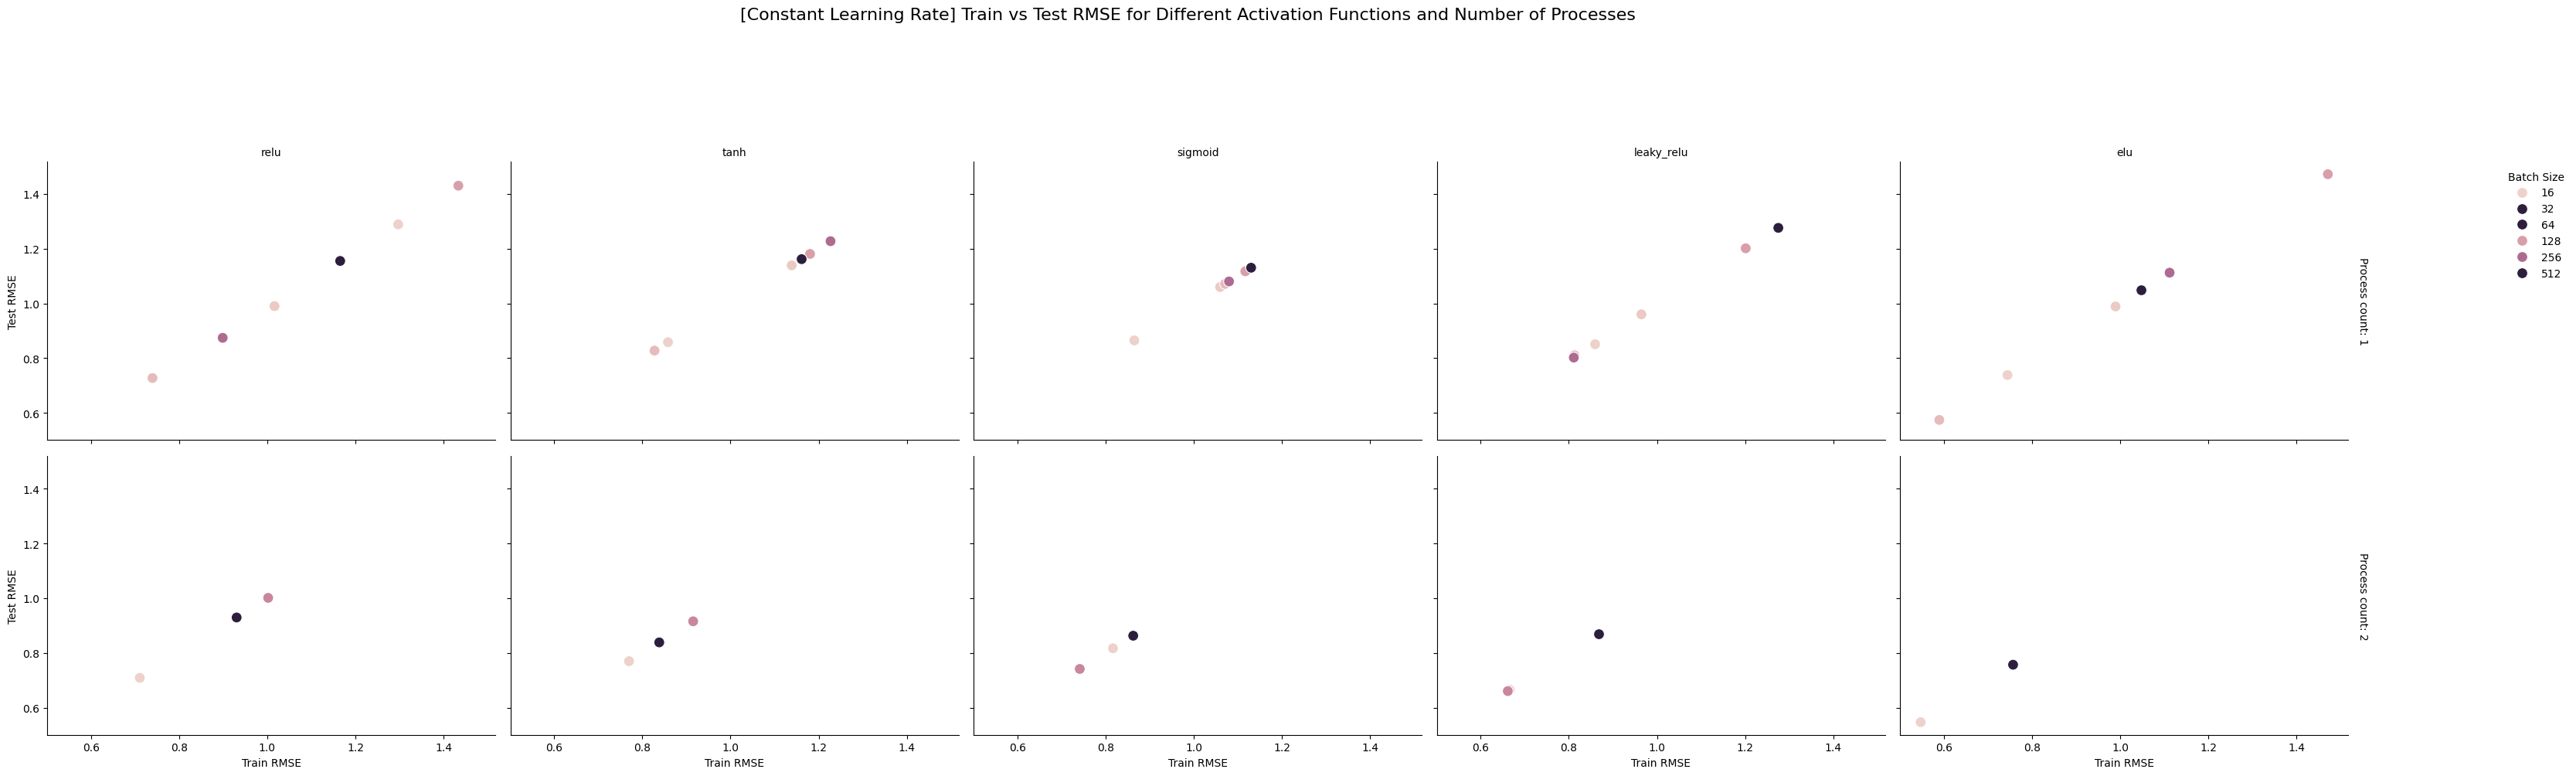

In [61]:
# plot test vs train rmse for different models

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, col='activation', row='num_processes', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='train_rmse', y='test_rmse', hue='batch_size', s=100)
g.set_axis_labels("Train RMSE", "Test RMSE")
g.set_titles(col_template="{col_name}", row_template="Process count: {row_name}")
# all legend outside the plot
g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batch Size')
plt.tight_layout()
g.fig.suptitle('[Constant Learning Rate] Train vs Test RMSE for Different Activation Functions and Number of Processes', fontsize=16, y=1.25)
# add a title for the entire plot below the subplots, space the title from the subplots
plt.subplots_adjust(top=1)
plt.savefig('../../logs/normalization_fix/constant_lr/train_test_rmse.png', bbox_inches='tight')
plt.show()

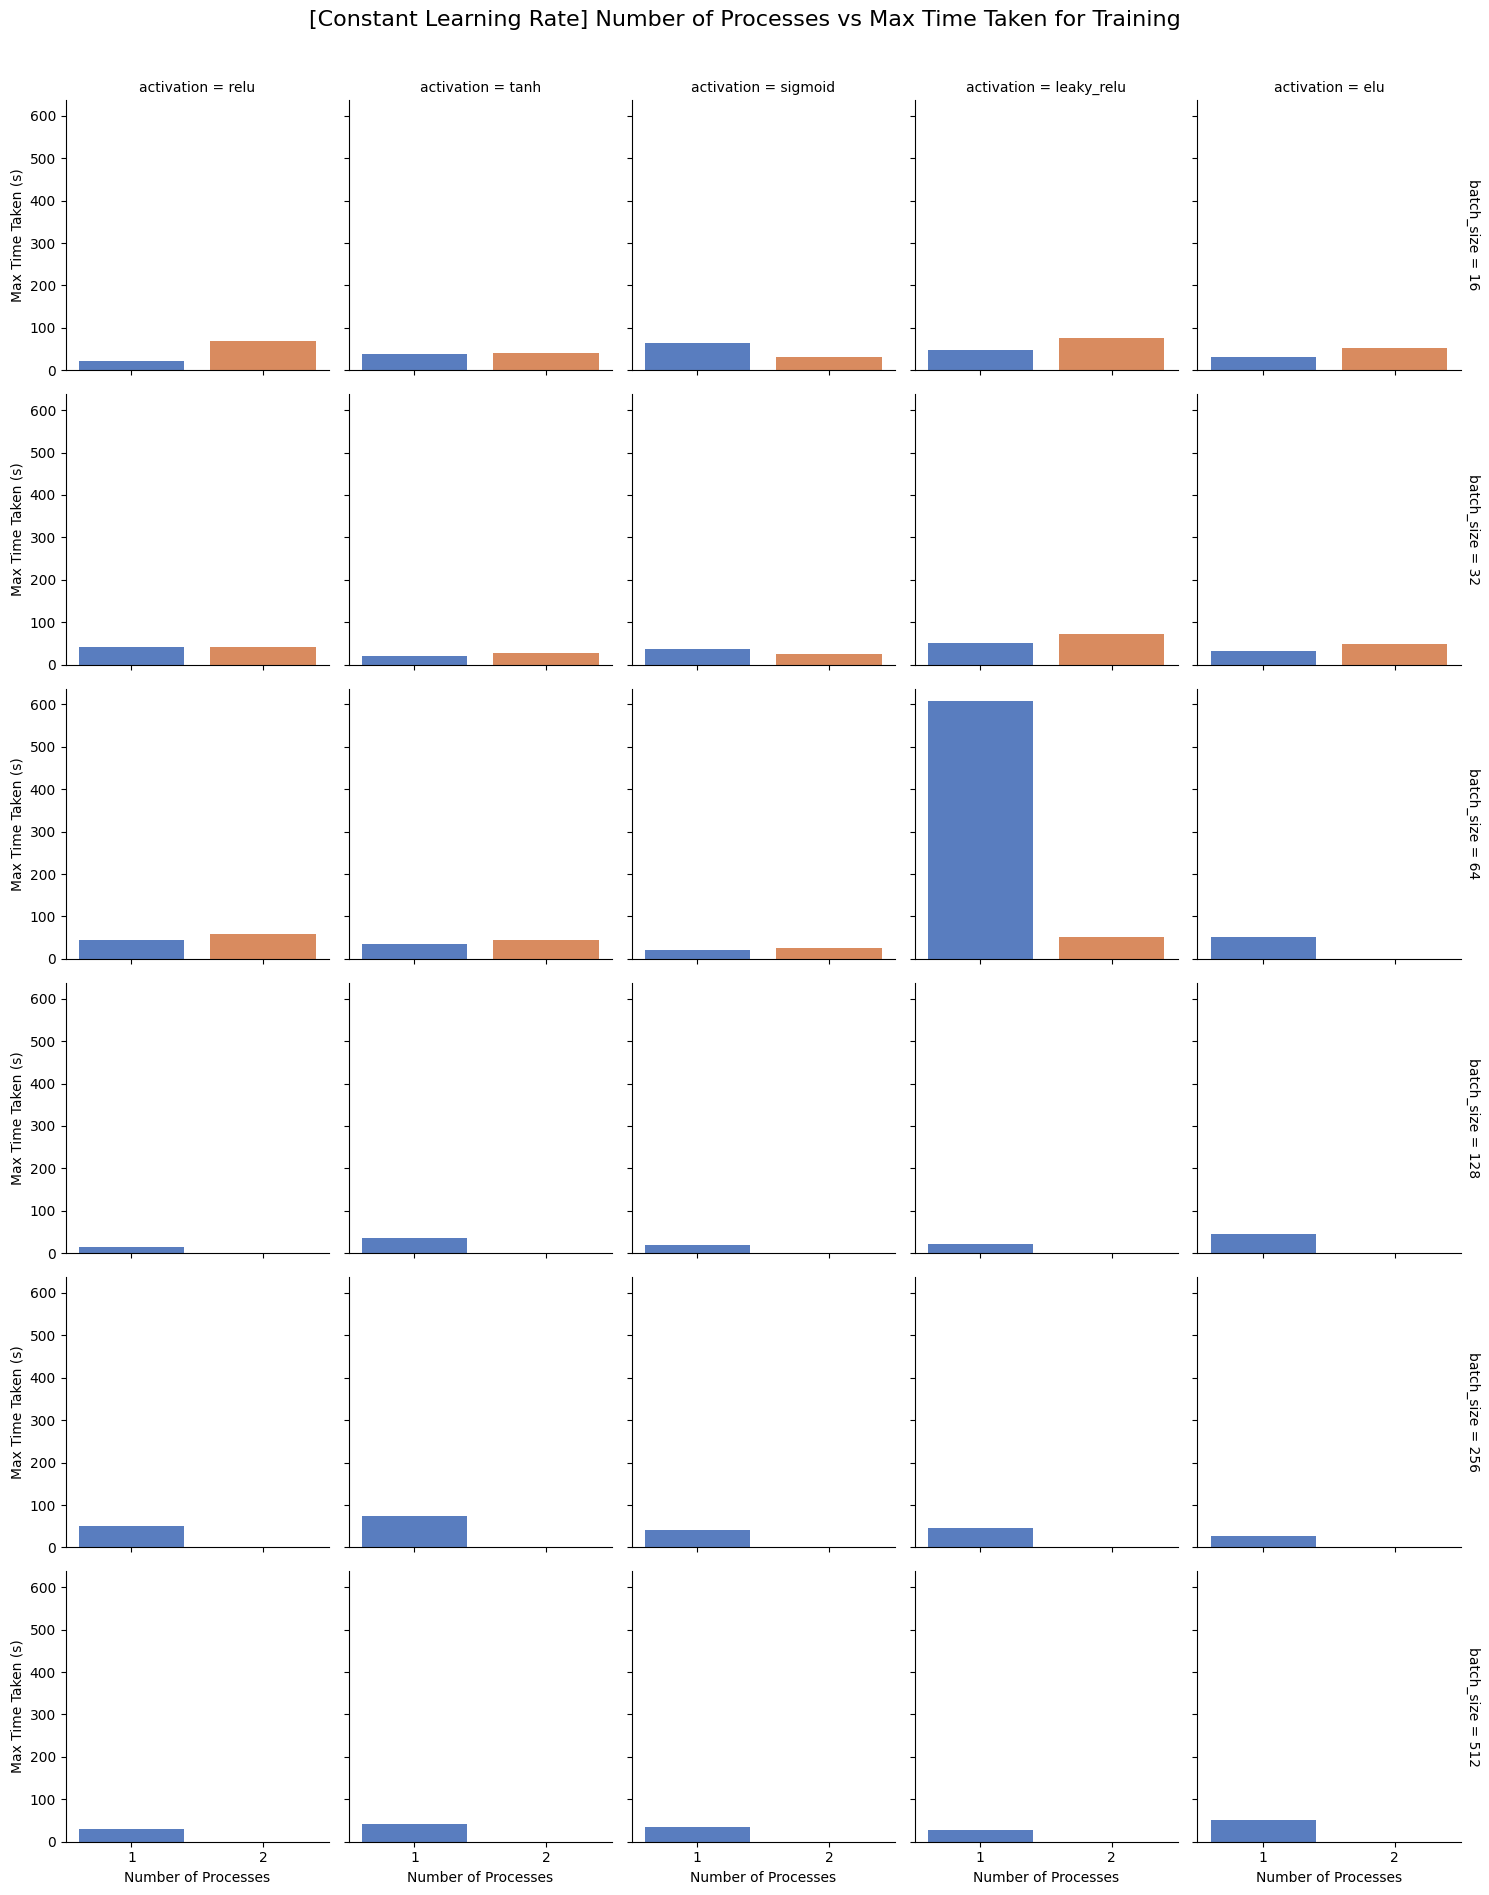

In [62]:
# plot a bar chart between number of processes and max time taken for training
# use grid plot for each activation function by batch size
# use the colors for the bars to be the same as the hues of the scatterplot
# make this a grid with different batch sizes as rows and different activation functions as columns
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
g.map_dataframe(sns.barplot, x='num_processes', y='train_time_max', palette='muted', hue ='num_processes', dodge=False)
g.set_axis_labels("Number of Processes", "Max Time Taken (s)")
plt.tight_layout()
g.fig.suptitle('[Constant Learning Rate] Number of Processes vs Max Time Taken for Training', fontsize=16, y=1.05)
# add a title for the entire plot below the subplots, space the title from the subplots
plt.subplots_adjust(top=1)
plt.savefig('../../logs/normalization_fix/constant_lr/process_train_time_max.png', bbox_inches='tight')

plt.show()

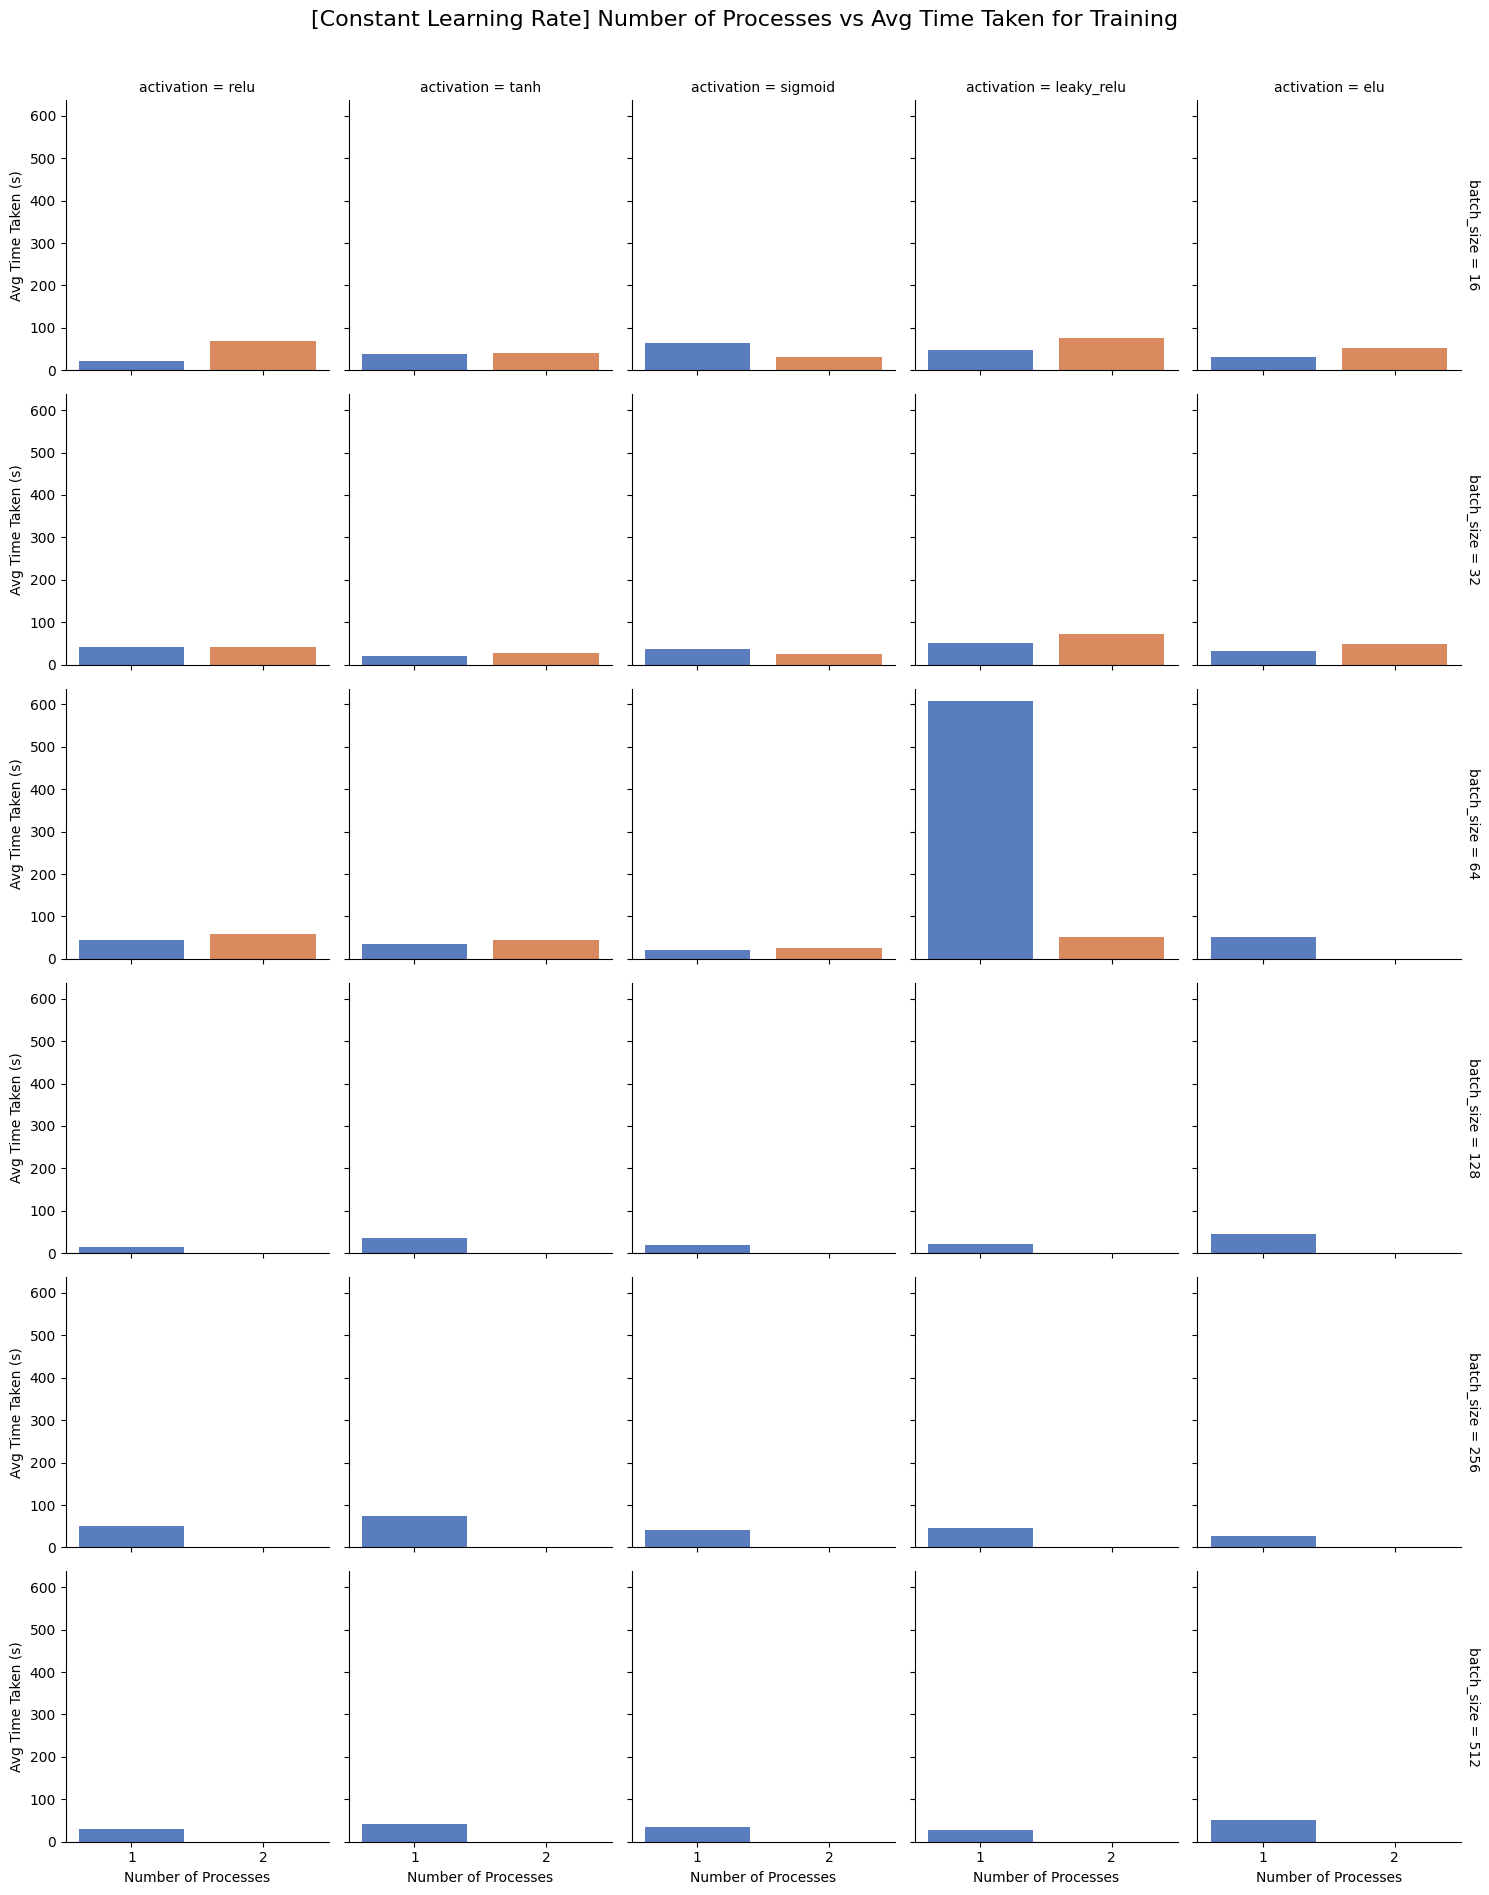

In [63]:
# plot a bar chart between number of processes and avg time taken for training
# use grid plot for each activation function by batch size
# use the colors for the bars to be the same as the hues of the scatterplot
# make this a grid with different batch sizes as rows and different activation functions as columns
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
g.map_dataframe(sns.barplot, x='num_processes', y='train_time_avg', palette='muted', hue ='num_processes', dodge=False)
g.set_axis_labels("Number of Processes", "Avg Time Taken (s)")
plt.tight_layout()
g.fig.suptitle('[Constant Learning Rate] Number of Processes vs Avg Time Taken for Training', fontsize=16, y=1.05)
# add a title for the entire plot below the subplots, space the title from the subplots
plt.subplots_adjust(top=1)
plt.savefig('../../logs/normalization_fix/constant_lr/process_train_time_avg.png', bbox_inches='tight')

plt.show()

In [64]:
# import the test_train_rmse data
# TODO update the path to the correct file after the whole local mpi run concludes
import pandas as pd
training_metrics_data = pd.read_csv('../../logs/normalization_fix/new/training_metrics.csv', header=0)
training_metrics_data.head()

,num_processes,iteration,batch_size,activation,learning_rate,training_loss
0,1,0,16,relu,0.00001,4.102639
1,1,1,16,relu,0.00001,2.980134
2,1,2,16,relu,0.00001,0.748109
3,1,3,16,relu,0.00001,0.503873
4,1,4,16,relu,0.00001,1.978110


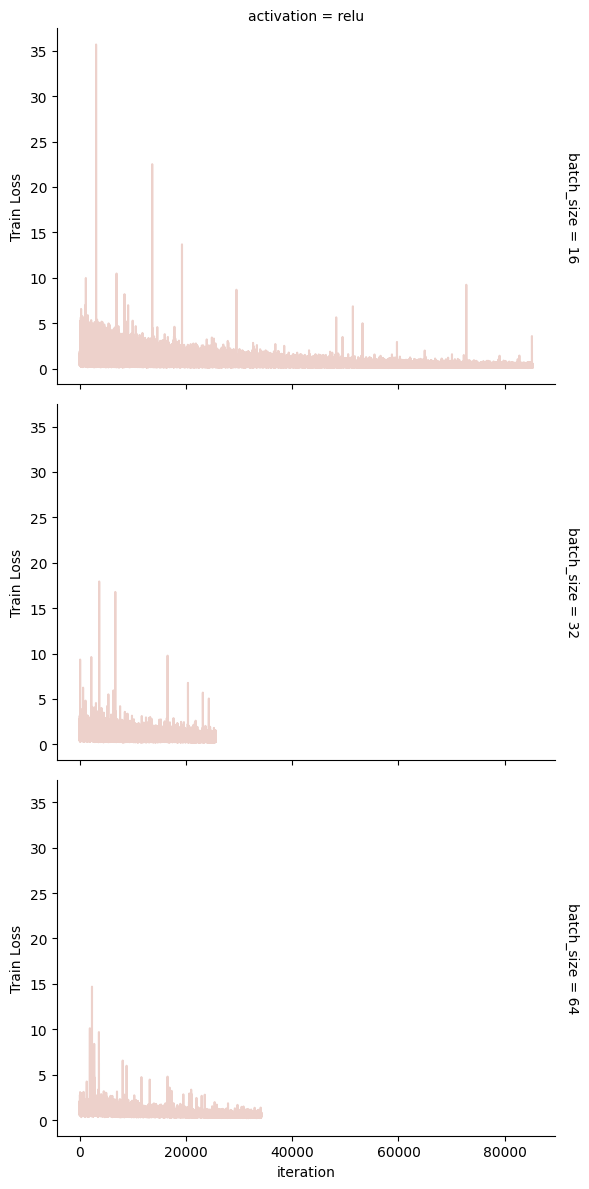

In [65]:
# plot number of iterations vs train loss for different models
# create a grid plot for each activation function by batch size
# use different hues for different batch sizes
# start off by only looking at relu activation function and process count of 2
# extend this to other activation functions and process counts later

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(training_metrics_data[(training_metrics_data['activation'] == 'relu') & (training_metrics_data['num_processes'] == 2)], col='activation', row='batch_size', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='iteration', y='training_loss', hue='batch_size')
g.set_axis_labels("iteration", "Train Loss")

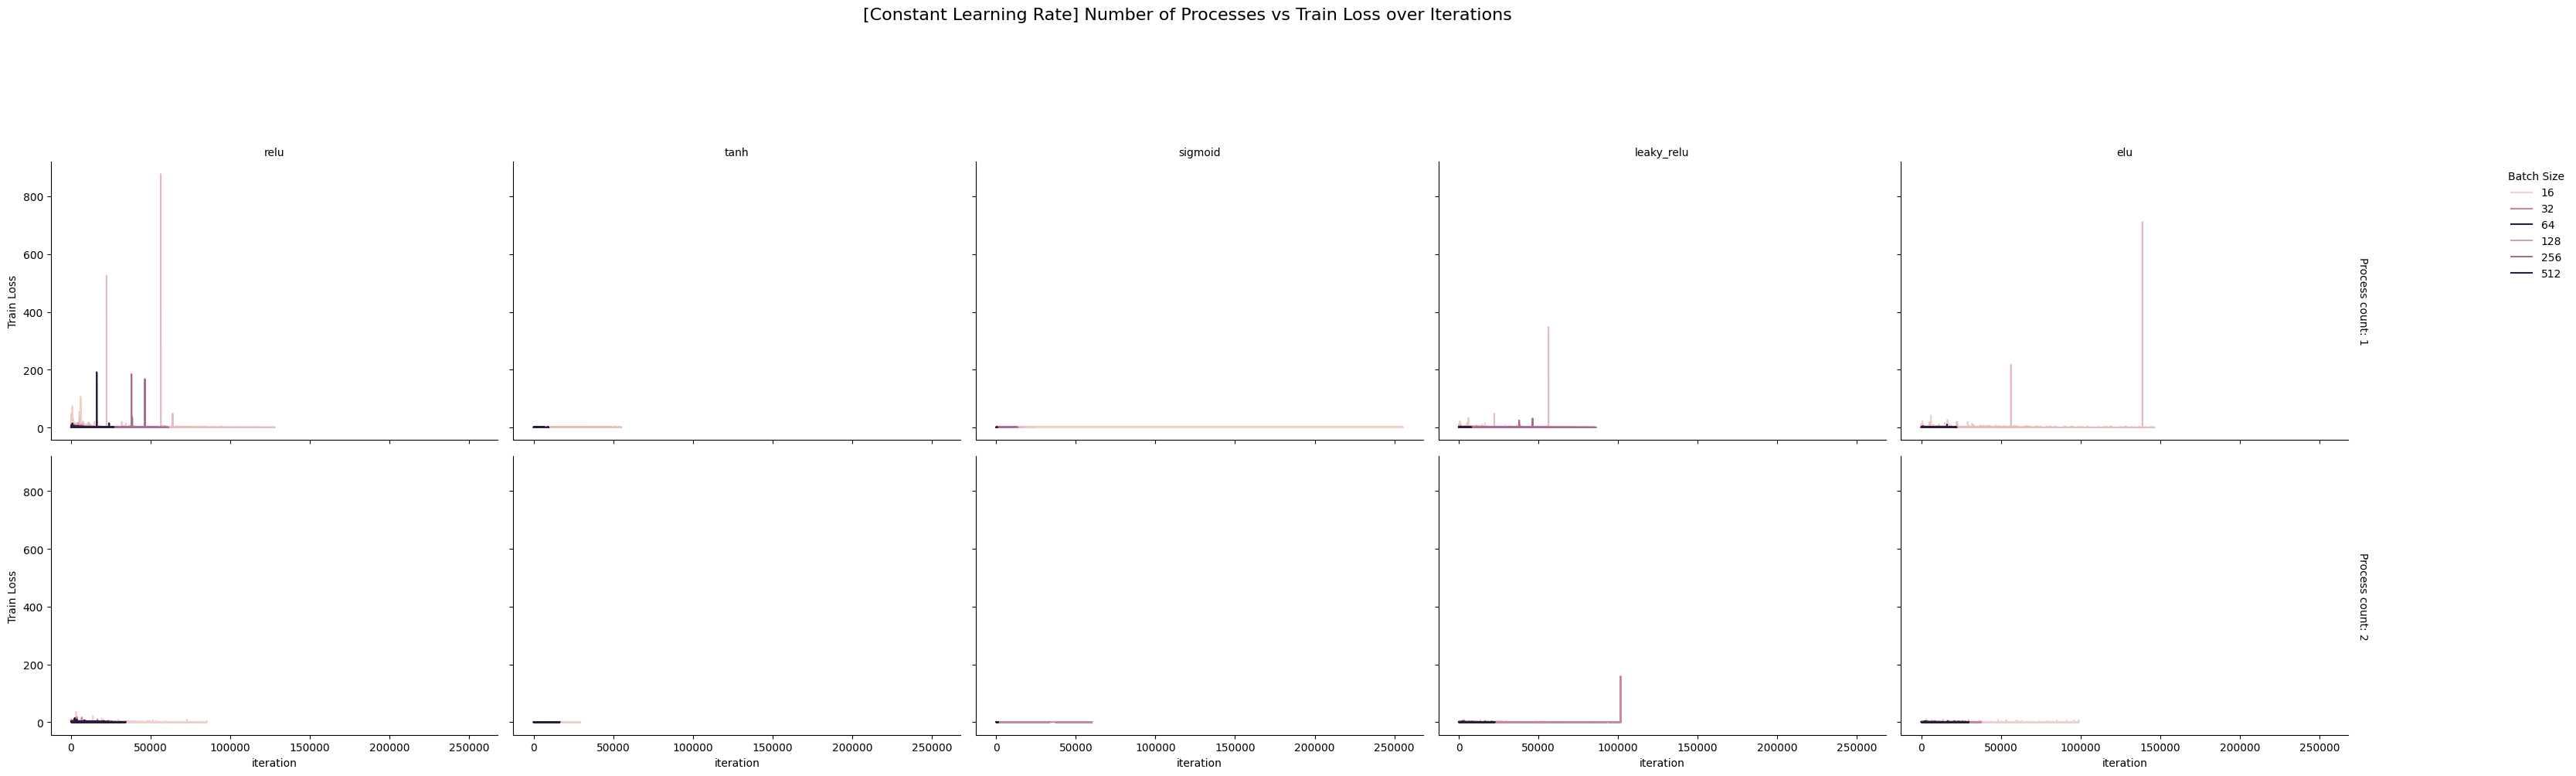

In [66]:
# extend the previous plot to include all activation functions and process counts
g = sns.FacetGrid(training_metrics_data, col='activation', row='num_processes', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='iteration', y='training_loss', hue='batch_size')
g.set_axis_labels("iteration", "Train Loss")
g.set_titles(col_template="{col_name}", row_template="Process count: {row_name}")
# all legend outside the plot
g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batch Size')
plt.tight_layout()
g.fig.suptitle('[Constant Learning Rate] Number of Processes vs Train Loss over Iterations', fontsize=16, y=1.25)
# add a title for the entire plot below the subplots, space the title from the subplots
plt.subplots_adjust(top=1)
plt.savefig('../../logs/normalization_fix/constant_lr/train_loss_over_iterations.png', bbox_inches='tight')
plt.show()